In [1]:
# stdlib
import sys
import warnings
from sklearn.datasets import load_breast_cancer,load_diabetes
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
import synthcity.logger as log
from synthcity.plugins import Plugins
from synthcity.plugins.core.dataloader import GenericDataLoader


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
# Preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
#loader = GenericDataLoader(X)
# synthcity absolute
from synthcity.plugins import Plugins

Plugins().list()

[2025-04-18T15:35:30.095101+0800][2576][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['pategan',
 'aim',
 'uniform_sampler',
 'adsgan',
 'image_cgan',
 'survae',
 'decaf',
 'survival_gan',
 'rtvae',
 'nflow',
 'fflows',
 'survival_nflow',
 'radialgan',
 'ctgan',
 'marginal_distributions',
 'privbayes',
 'image_adsgan',
 'timevae',
 'dpgan',
 'bayesian_network',
 'dummy_sampler',
 'tvae',
 'ddpm',
 'great',
 'timegan',
 'survival_ctgan',
 'arf']

In [ ]:
def smart_normalization(data, discrete_cols, threshold=0.1):
    continuous_cols = [col for col in data.columns if col not in discrete_cols]
    if not continuous_cols:
        return data.copy(), False

    needs_scaling = False
    for col in continuous_cols:
        col_mean = data[col].mean()
        col_std = data[col].std()
        if abs(col_mean) > threshold or not (1-threshold < col_std < 1+threshold):
            needs_scaling = True
            break
    
    if needs_scaling:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        data_scaled = data.copy()
        data_scaled[continuous_cols] = scaler.fit_transform(data[continuous_cols])
        return data_scaled, True
    else:
        return data.copy(), False
import pandas as pd
import numpy as np

def auto_detect_discrete_columns(data, unique_ratio_threshold=0.05, unique_count_threshold=20):

    discrete_cols = []
    
    for col in data.columns:
        col_data = data[col].dropna()
        
        if len(col_data) == 0:
            continue
        dtype = col_data.dtype

        if dtype in [object, 'category', bool]:
            discrete_cols.append(col)
            continue
            
        if np.issubdtype(dtype, np.number):
            n_unique = col_data.nunique()
            total = len(col_data)
            
            if n_unique <= unique_count_threshold:
                discrete_cols.append(col)
                continue

            unique_ratio = n_unique / total
            if unique_ratio < unique_ratio_threshold:
                if np.issubdtype(dtype, np.integer):
                    discrete_cols.append(col)
                elif (col_data == col_data.astype(int)).all():
                    discrete_cols.append(col)
    
    return discrete_cols

if __name__ == "__main__":
    #real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
    real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
    #real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
    #real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
    real_data = pd.read_csv(real_path)
    
    discrete_cols = auto_detect_discrete_columns(real_data)
    print(discrete_cols)
    real_data_normalized, scaled = smart_normalization(real_data, discrete_cols)
    if scaled:
        print("doing")
    else:
        print("skip")

In [ ]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get("ctgan", n_iter = 200)
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/creditcard2.csv"
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
#real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
data = pd.read_csv(real_path)
loader = GenericDataLoader(data)
syn_model.fit(loader)

[2025-04-18T15:39:27.937871+0800][2576][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 200/200 [02:25<00:00,  1.37it/s]


In [5]:
a = syn_model.generate(count=2000).dataframe()
a.to_csv('./CTGAN-Adu_1.csv', index=False)

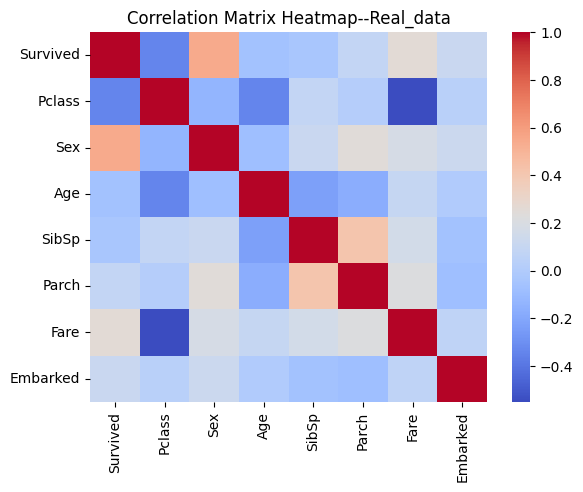

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix_real = data.corr()
sns.heatmap(correlation_matrix_real, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap--Real_data')
plt.show()

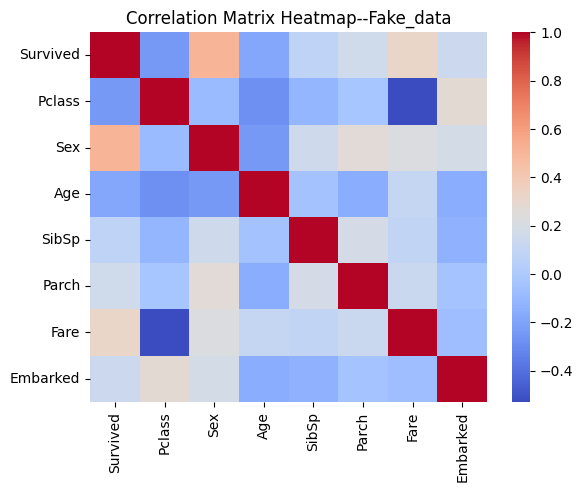

In [14]:
correlation_matrix_fake = a.corr()
sns.heatmap(correlation_matrix_fake, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap--Fake_data')
plt.show()